In [1]:
import numpy as np
import pandas as pd
from block_based_rlnc import BlockBasedRLNC
import plotly.express as px
import plotly.graph_objects as go


In [19]:
sims=[]

In [3]:
# del sims[-1]

In [20]:
base_config=dict(field_order=2**8, generation_size=16,
                    packet_size=16, total_size=1024*64,
                    initial_redundancy=1, initial_window_size=1,
                    ge_loss_good_to_bad=0.05, ge_loss_bad_to_good=0.2,
                    exponential_loss_param=0.045,
                    ee_loss_error= 0.15, seed=2,
                    force_to_recreate_new_data=False)

figues_path="figs/"

In [21]:
def simulate(config,name):
    applied_config=base_config|config
    rlnc = BlockBasedRLNC(**applied_config);
    analytics_result = rlnc.run_simulation()
    df = analytics_result.get_analytics_data_frame()
    df.name = name
    return [df,config]

In [6]:
%%capture

config=dict(loss_mode="ge", adjust_algorithm="primary")

result = simulate(config,"Gilbert Elliott - Primary")
sims.append(result)

In [7]:
%%capture

config=dict(loss_mode="ge", adjust_algorithm="none")

result = simulate(config,"Gilbert Elliott -  None")
sims.append(result)

In [8]:
%%capture

config=dict(loss_mode="exponential", adjust_algorithm="primary")

result = simulate(config,"Exponential - Primary")
sims.append(result)

In [9]:
%%capture

config=dict(loss_mode="exponential", adjust_algorithm="none")

result = simulate(config,"Exponential - None")
sims.append(result)

In [ ]:
%%capture

config=dict(loss_mode="constant", loss_rate=0.05, adjust_algorithm="primary")

result = simulate(config,"Constant - 5% - Primary")
sims.append(result)

In [ ]:
%%capture

config=dict(loss_mode="constant", loss_rate=0.05, adjust_algorithm="none")

result = simulate(config,"Constant - 5% - None")
sims.append(result)

In [ ]:
%%capture

config=dict(loss_mode="constant", loss_rate=0.15, adjust_algorithm="primary")

result = simulate(config,"Constant - 15% - Primary")
sims.append(result)

In [ ]:
%%capture

config=dict(loss_mode="constant", loss_rate=0.15, adjust_algorithm="none")

result = simulate(config,"Constant - 15% - None")
sims.append(result)

In [10]:
%%capture

config=dict(loss_mode="constant", loss_rate=0.40, adjust_algorithm="primary")

result = simulate(config,"Constant - 40% - Primary")
sims.append(result)

In [11]:
%%capture

config=dict(loss_mode="constant", loss_rate=0.40, adjust_algorithm="none")

result = simulate(config,"Constant - 40% - None")
sims.append(result)

In [22]:
%%capture

config=dict(loss_mode="ee", loss_rate=0.05, adjust_algorithm="primary")

result = simulate(config,"Erasure With Error - 5% - Primary")
sims.append(result)

In [23]:
%%capture

config=dict(loss_mode="ee", loss_rate=0.05, adjust_algorithm="none")

result = simulate(config,"Erasure With Error - 5% - None")
sims.append(result)

In [24]:
%%capture

config=dict(loss_mode="ee", loss_rate=0.15, adjust_algorithm="primary")

result = simulate(config,"Erasure With Error - 15% - Primary")
sims.append(result)

In [25]:
%%capture

config=dict(loss_mode="ee", loss_rate=0.15, adjust_algorithm="none")

result = simulate(config,"Erasure With Error - 15% - None")
sims.append(result)

In [26]:
%%capture

config=dict(loss_mode="ee", loss_rate=0.40, adjust_algorithm="primary")

result = simulate(config,"Erasure With Error - 40% - Primary")
sims.append(result)

In [27]:
%%capture

config=dict(loss_mode="ee", loss_rate=0.40, adjust_algorithm="none")

result = simulate(config,"Erasure With Error - 40% - None")
sims.append(result)

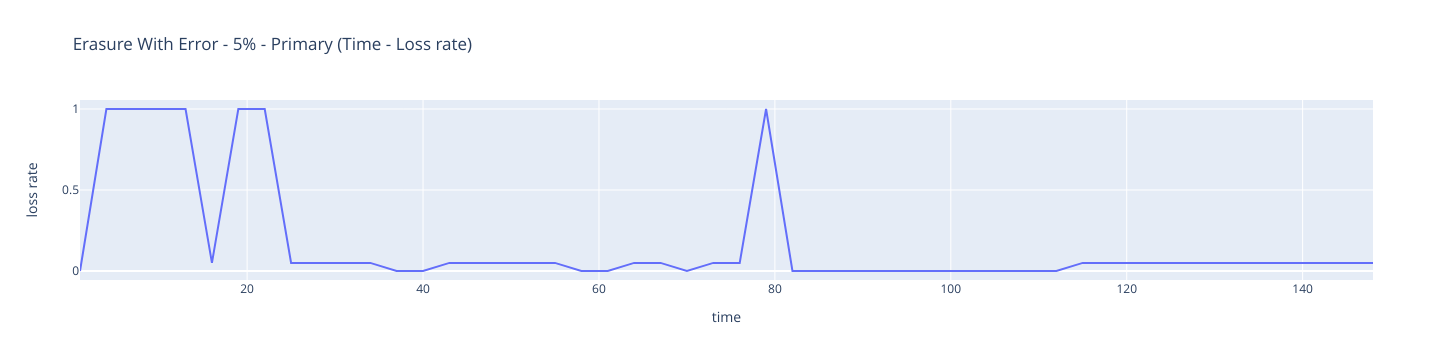

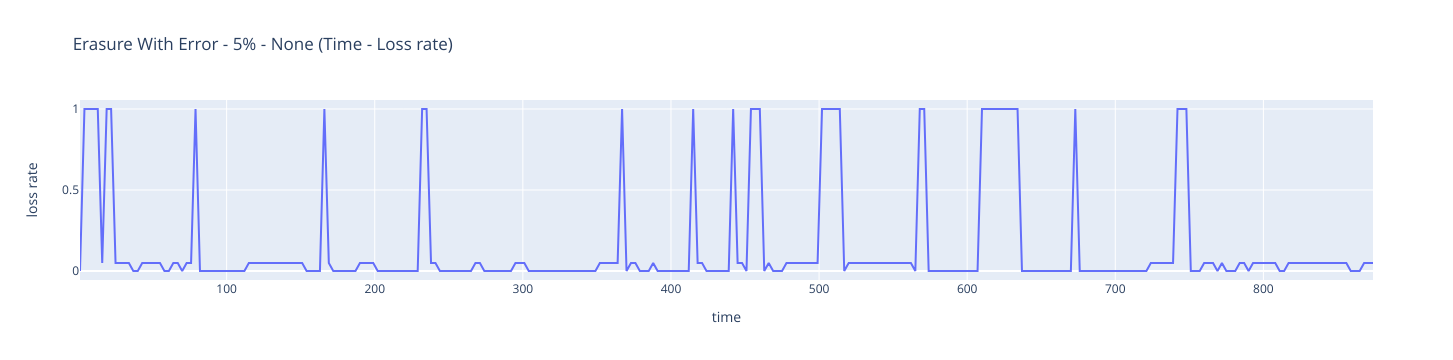

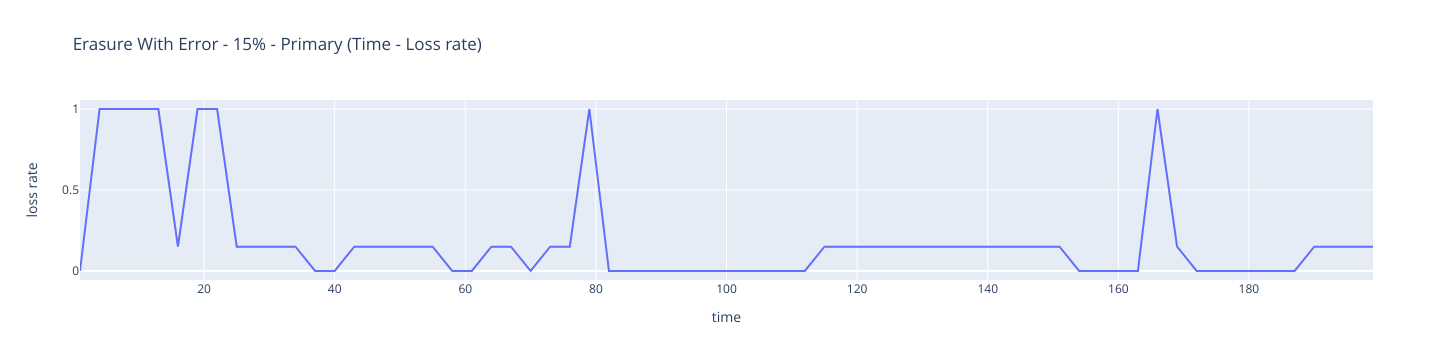

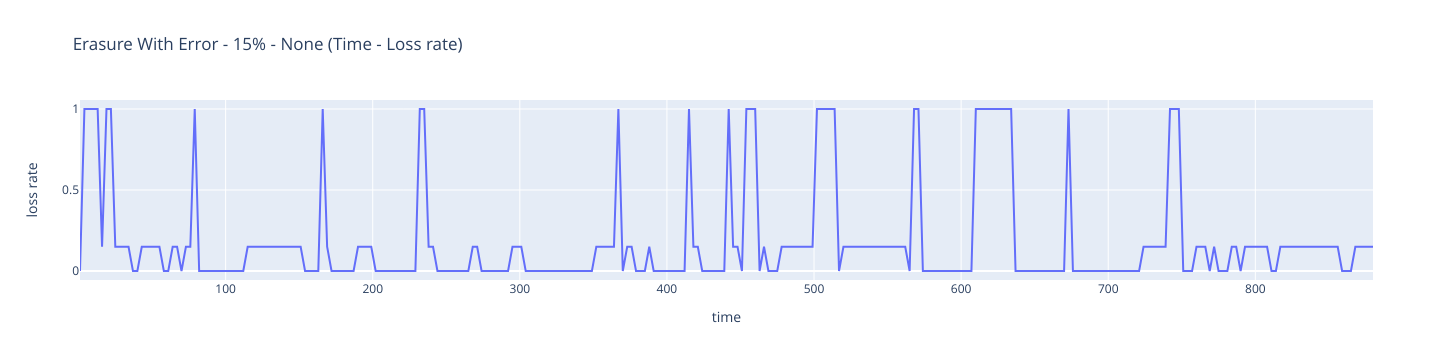

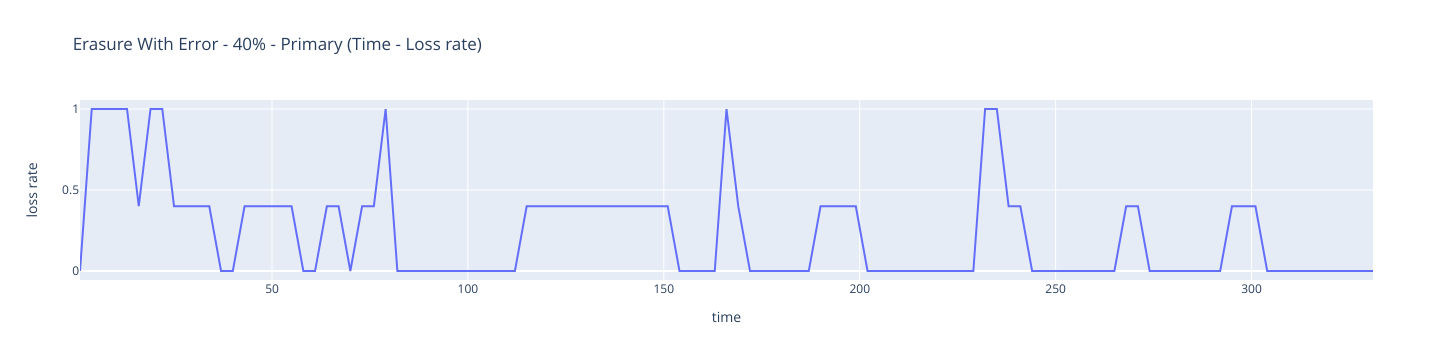

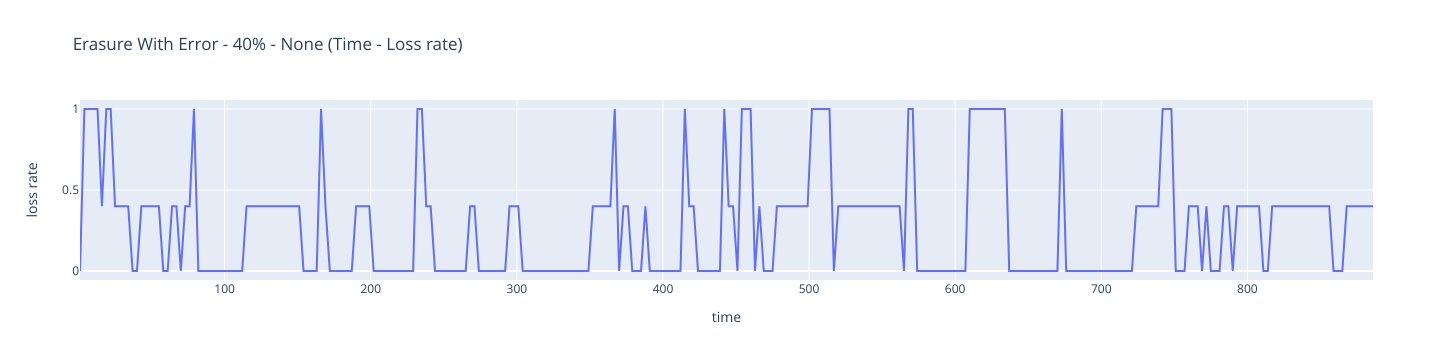

In [28]:
for index,sim in enumerate(sims):
    df=sim[0]
    name=df.name+' (Time - Loss rate)'
    fig = px.line(df.query("type=='send'"), x="time", y="loss rate", title=name)
    fig.show()
    fig.write_image(figues_path+name+".pdf")

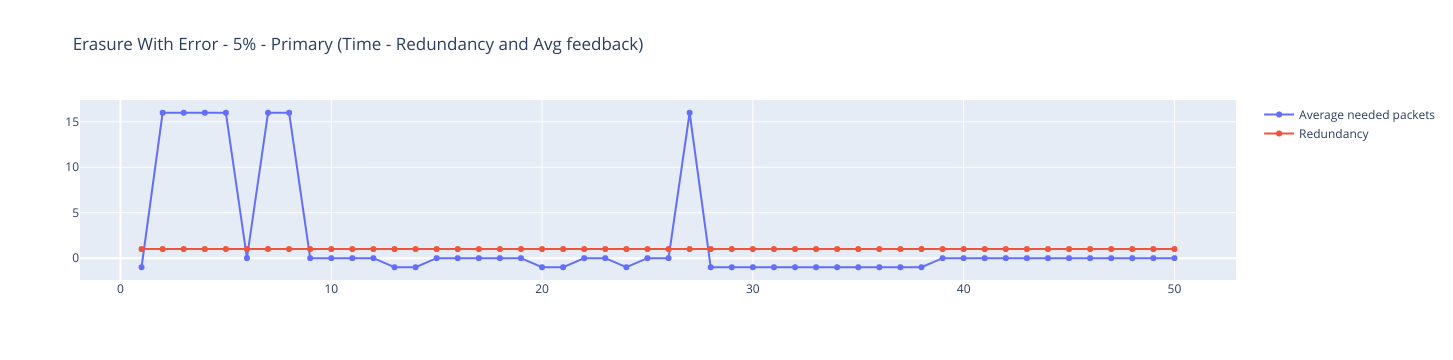

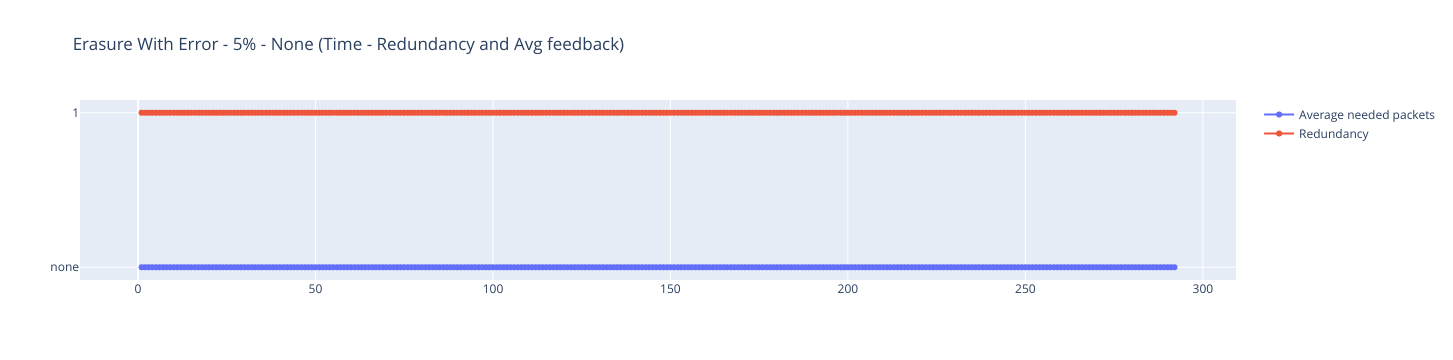

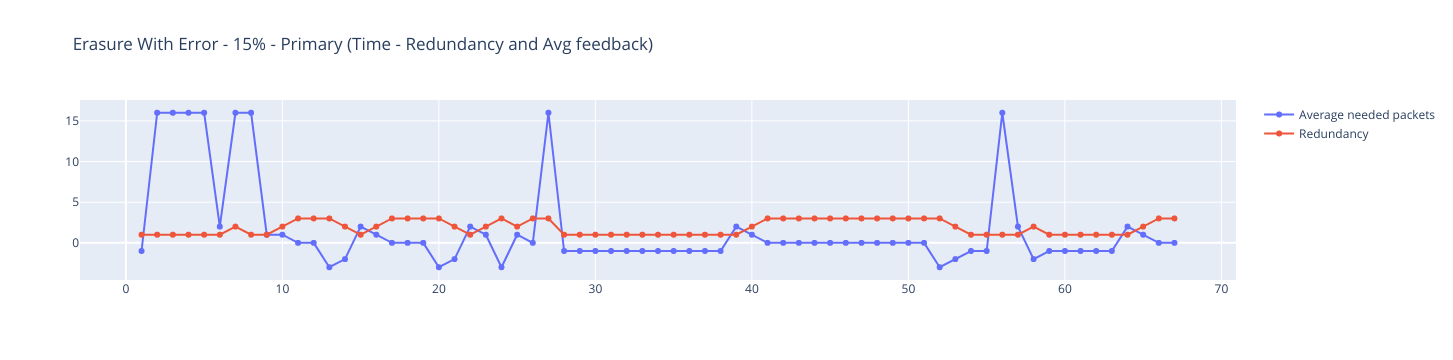

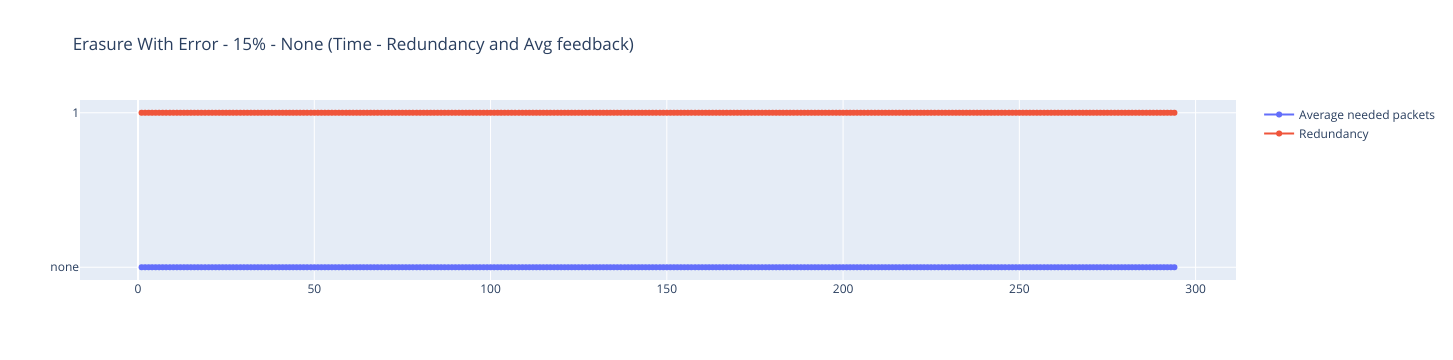

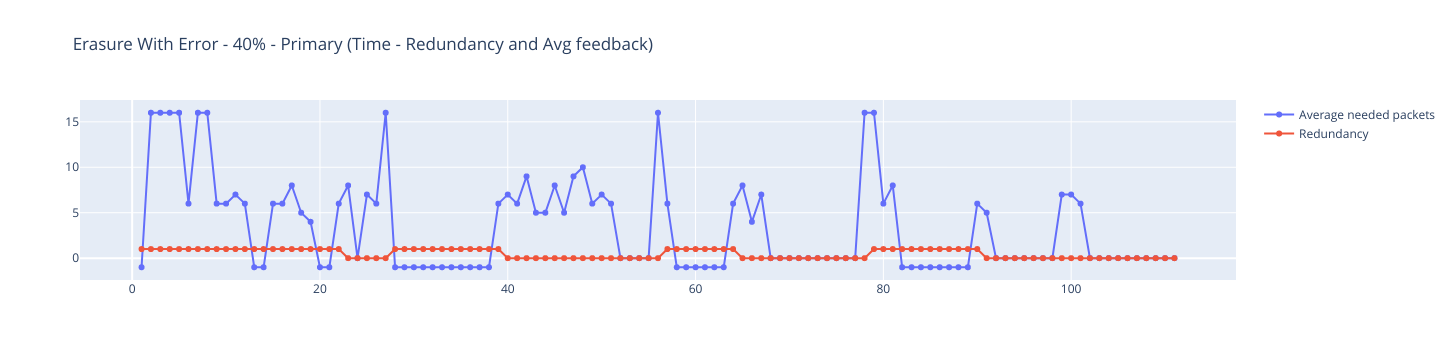

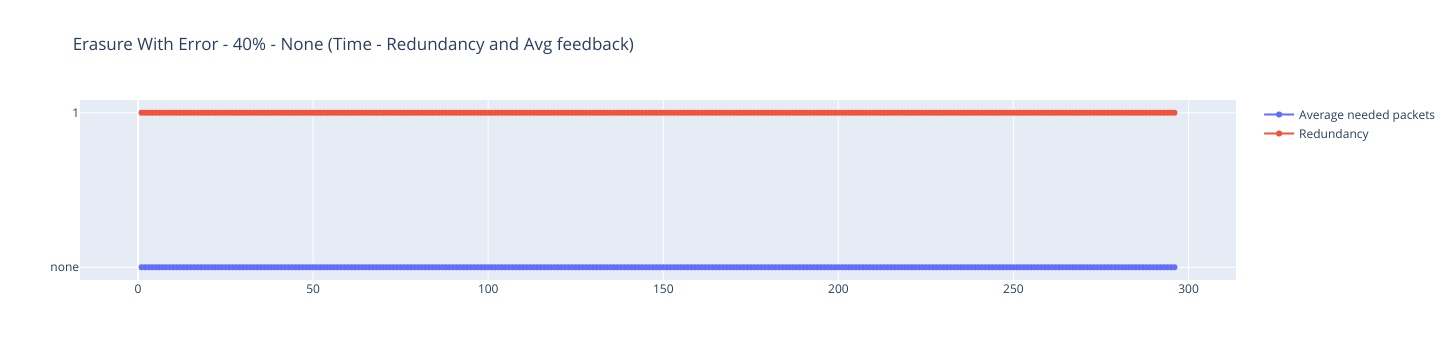

In [29]:
for index,sim in enumerate(sims):
    dataframe = sim[0]
    fig = go.Figure()
    name=dataframe.name+' (Time - Redundancy and Avg feedback)'
    fig.update_layout(title_text=name,)


    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='feedback'")["average feedback"],
        mode="lines+markers",
        name="Average needed packets",
        textposition="top center",
    ))

    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='send'")["redundancy"],
        mode="lines+markers",
        name="Redundancy",
        textposition="top center"
    ))


    fig.show()
    fig.write_image(figues_path+name+".pdf")


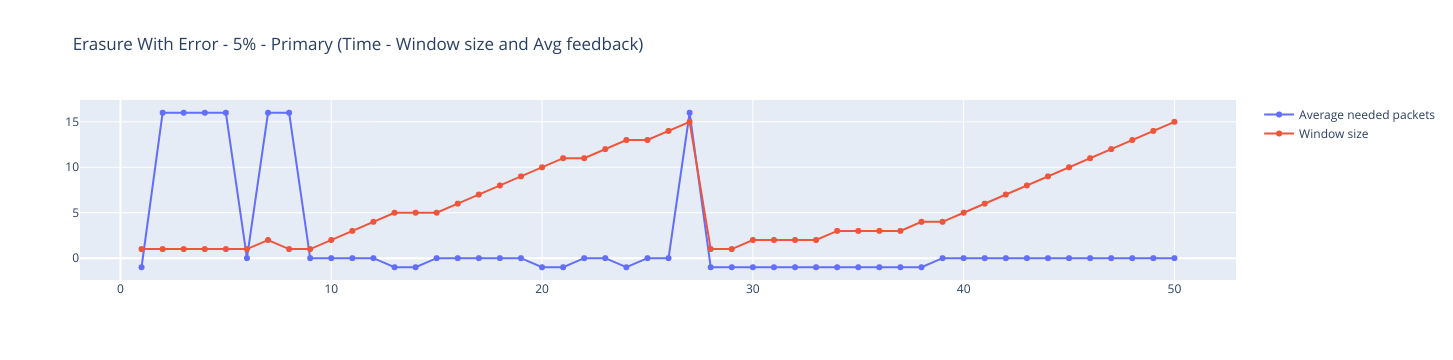

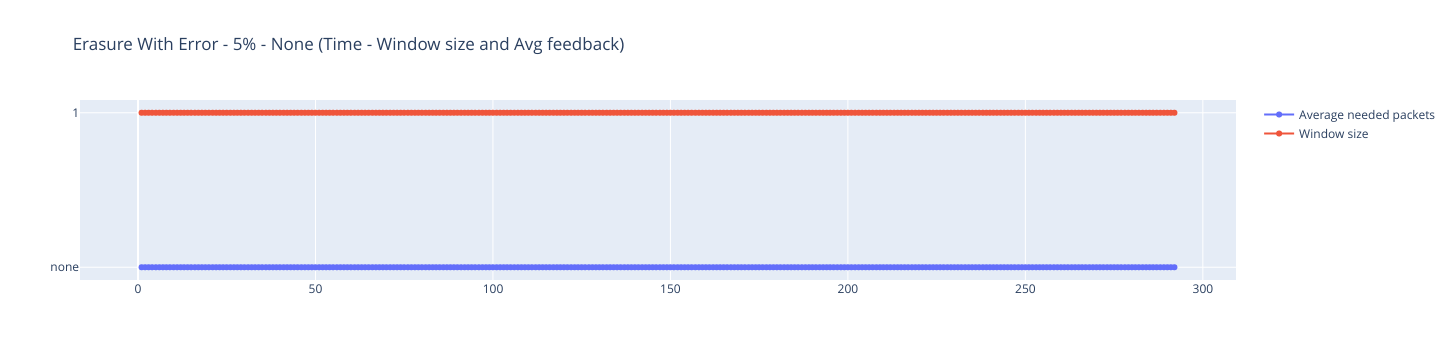

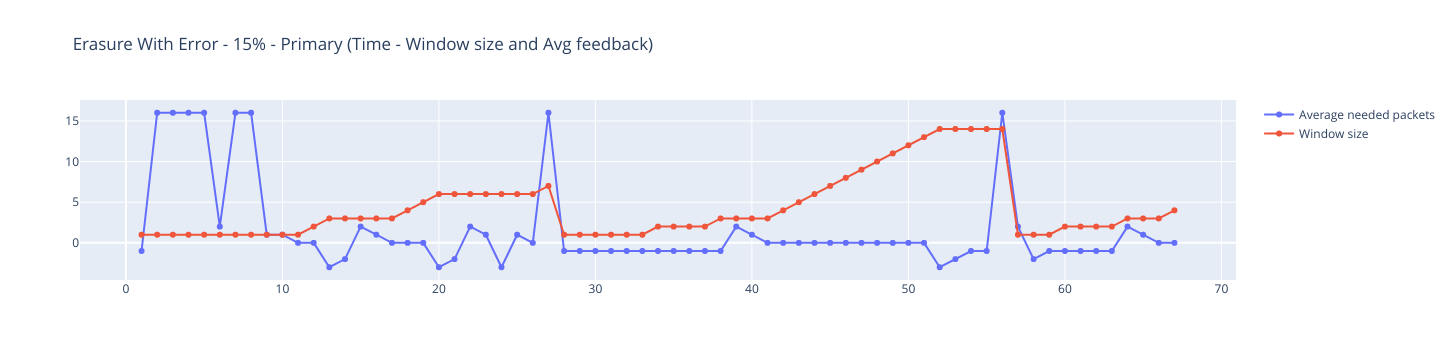

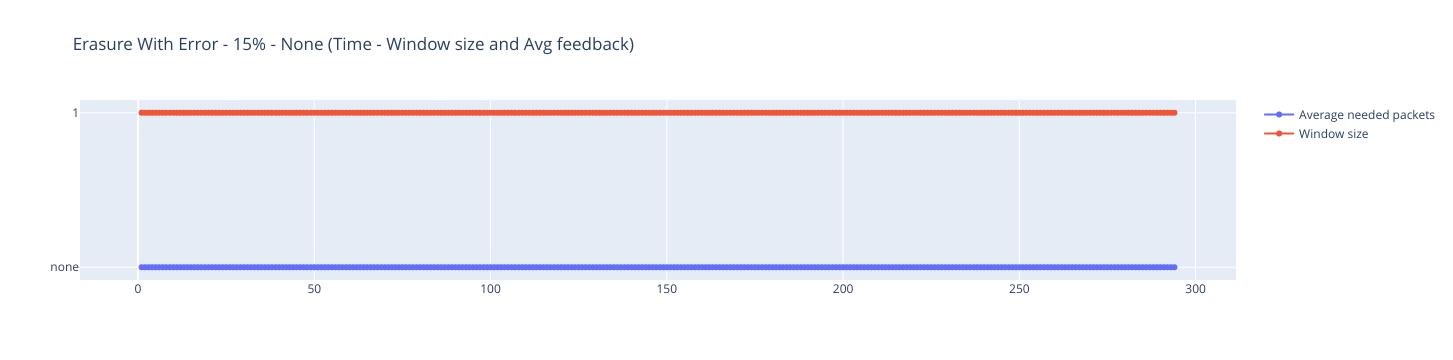

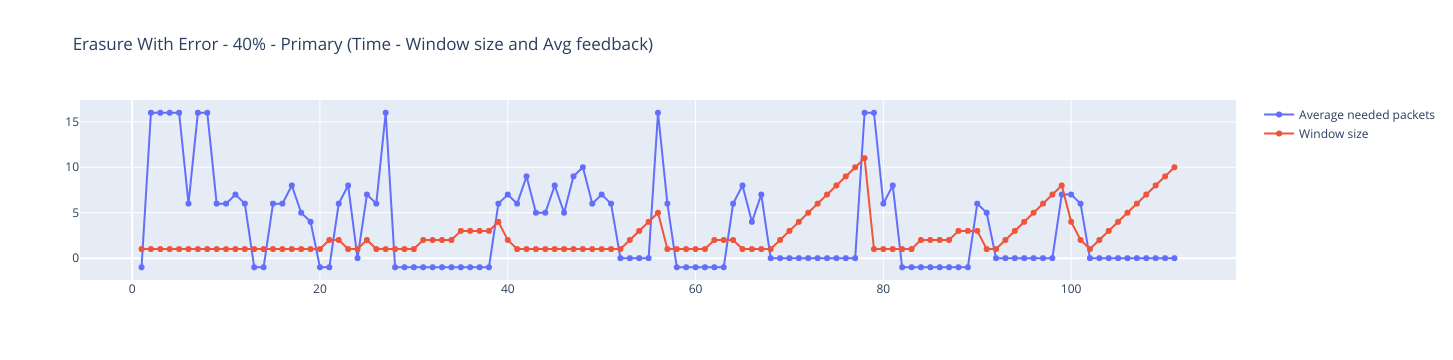

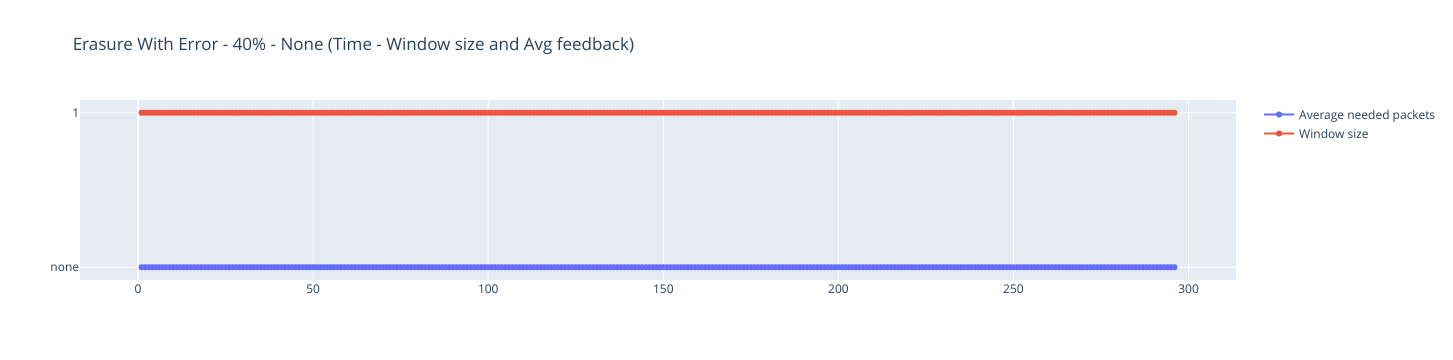

In [30]:
for index,sim in enumerate(sims):
    dataframe = sim[0]
    fig = go.Figure()
    name=dataframe.name+' (Time - Window size and Avg feedback)'
    fig.update_layout(title_text=name,)

    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='feedback'")["average feedback"],
        mode="lines+markers",
        name="Average needed packets",
        textposition="top center",
    ))

    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='send'")["window size"],
        mode="lines+markers",
        name="Window size",
        textposition="top center"
    ))


    fig.show()
    fig.write_image(figues_path+name+".pdf")




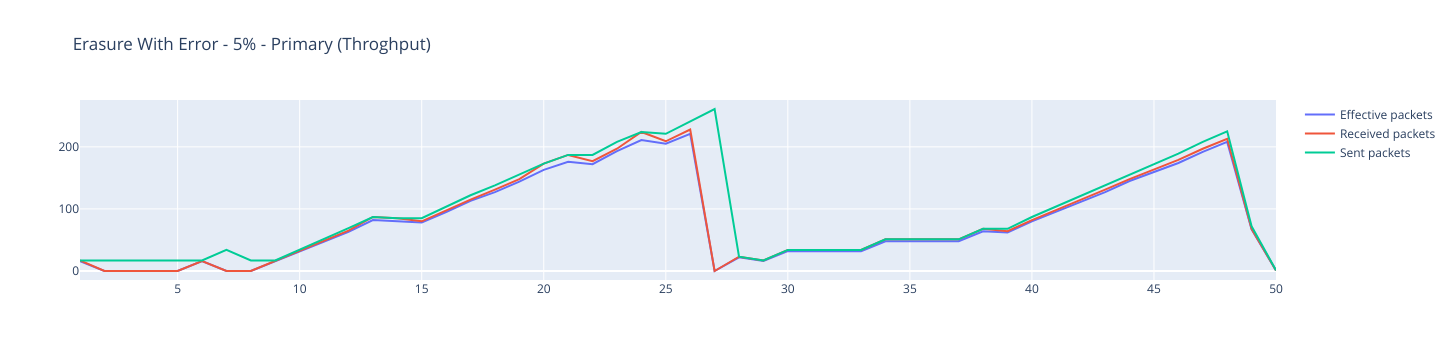

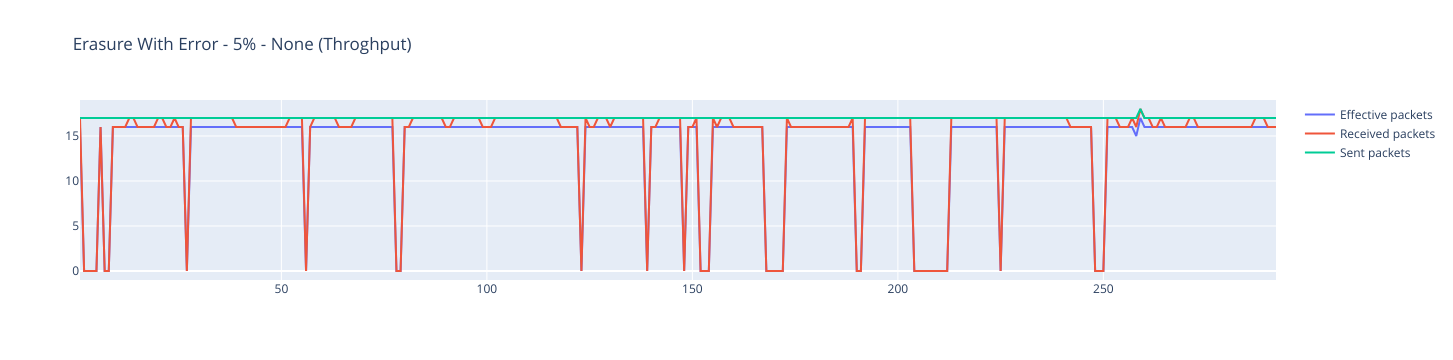

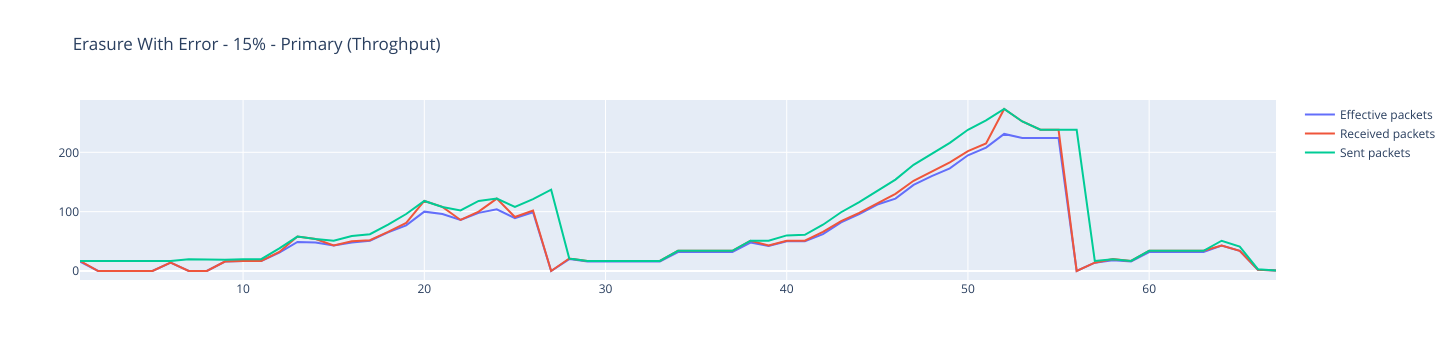

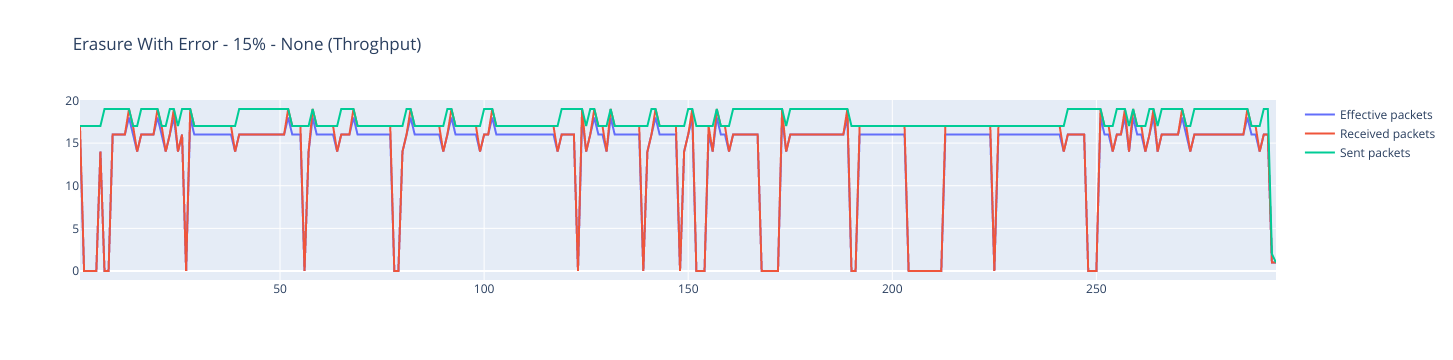

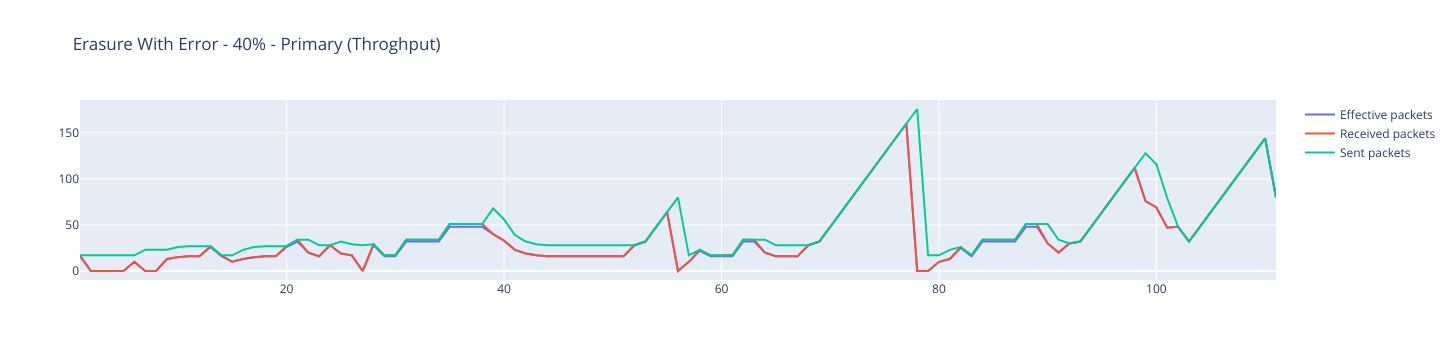

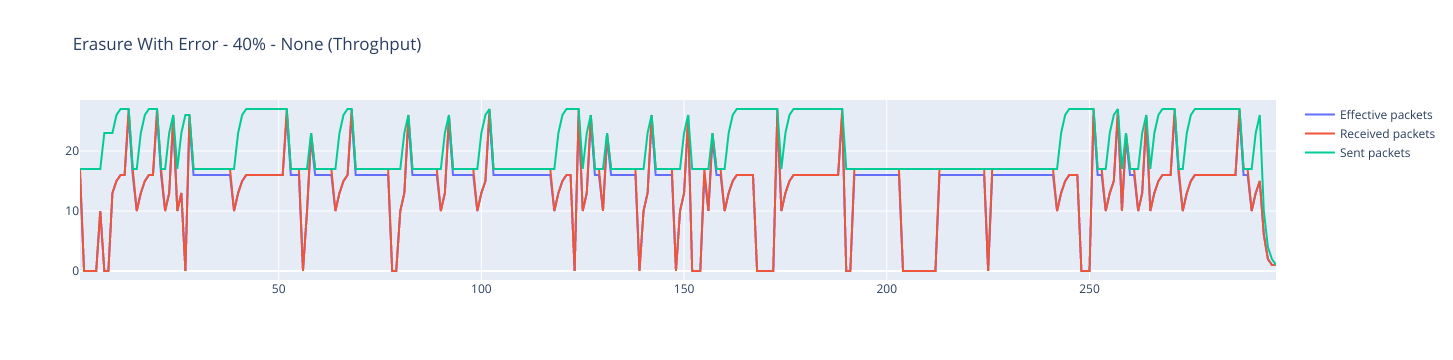

In [31]:
for index,sim in enumerate(sims):
    dataframe = sim[0]
    fig = go.Figure()
    name=dataframe.name+' (Throghput)'
    fig.update_layout(title_text=name)

    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='receive'")["effective packets"],
        mode="lines",
        name="Effective packets",
        textposition="top center",
    ))

    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='receive'")["received packets"],
        mode="lines",
        name="Received packets",
        textposition="top center",
    ))

    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='send'")["total sent packets"],
        mode="lines",
        name="Sent packets",
        textposition="top center",
    ))


    fig.show()
    fig.write_image(figues_path+name+".pdf")


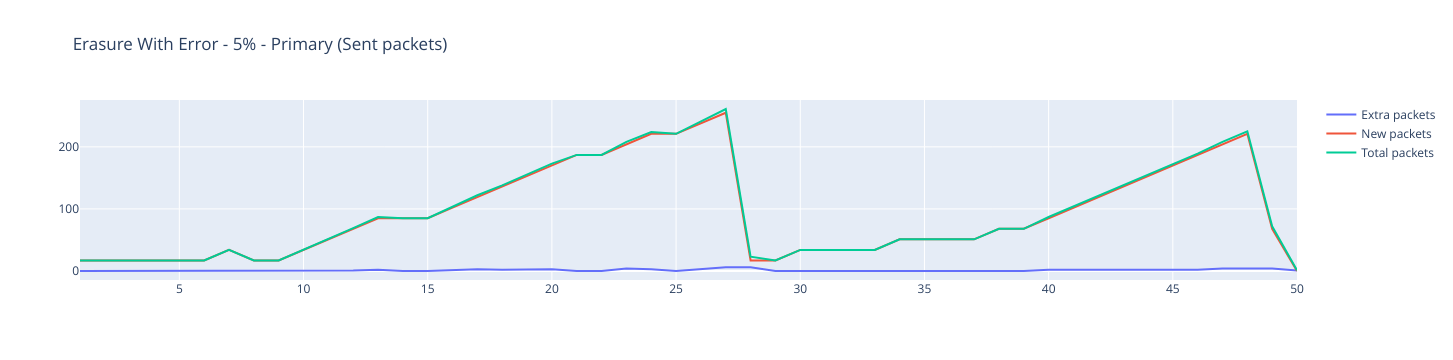

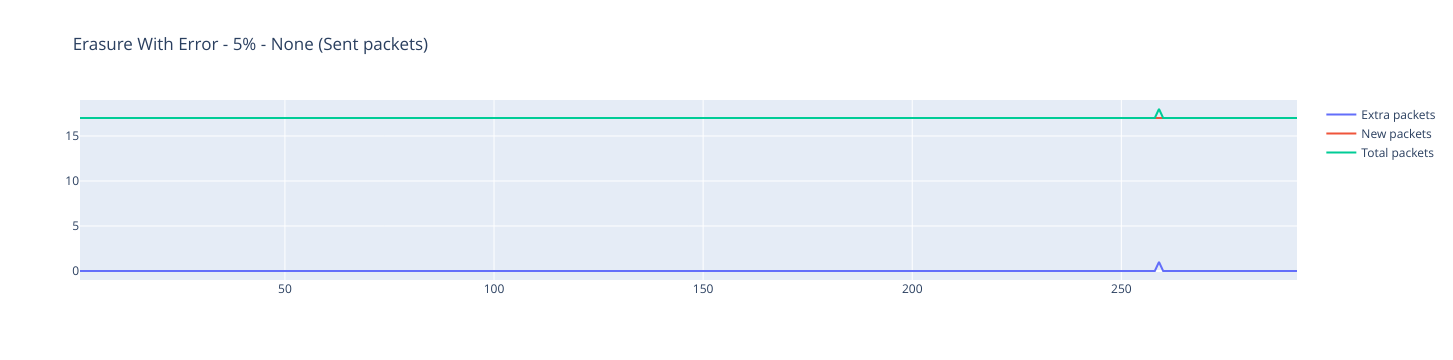

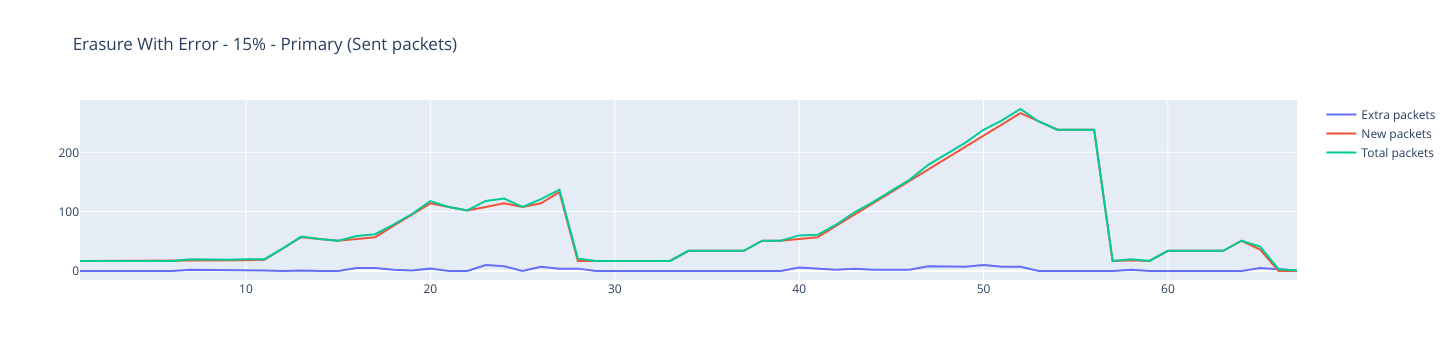

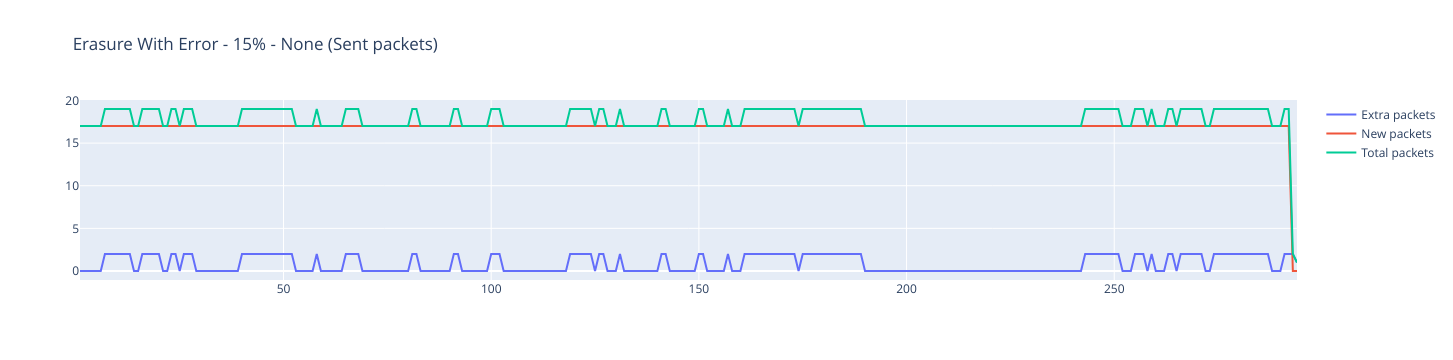

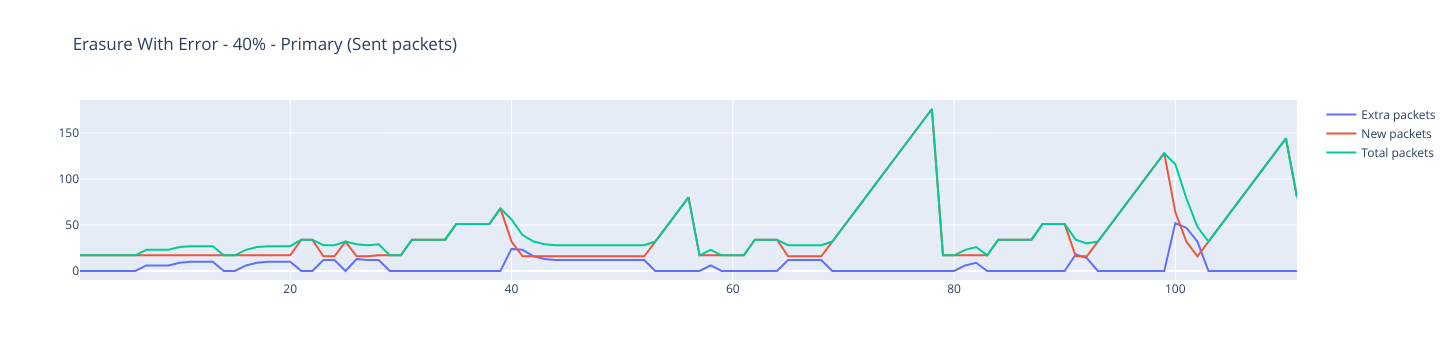

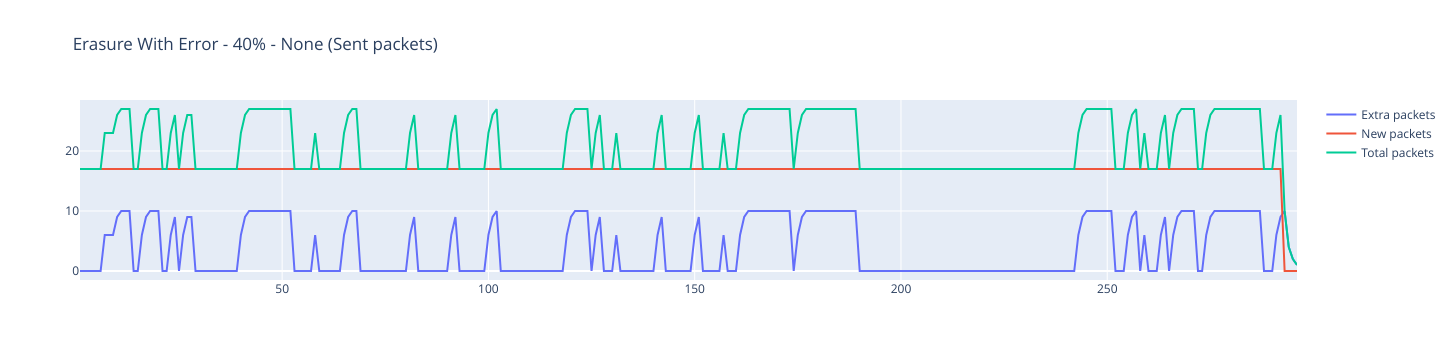

In [32]:
for index,sim in enumerate(sims):
    dataframe = sim[0]
    fig = go.Figure()
    name=dataframe.name+' (Sent packets)'
    fig.update_layout(title_text=name)
    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='send'")["extra packets count"],
        mode="lines",
        name="Extra packets",
        textposition="top center",
    ))
    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='send'")["new coded packets count"],
        mode="lines",
        name="New packets",
        textposition="top center",
    ))
    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='send'")["total sent packets"],
        mode="lines",
        name="Total packets",
        textposition="top center",
    ))
    fig.show()
    fig.write_image(figues_path+name+".pdf")
